**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

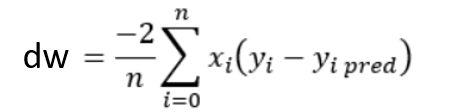

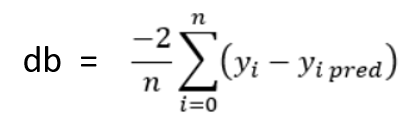

**Importing the Dependencies**

In [41]:
# import numpy libraries
import numpy as np

**Linear Regression**

In [42]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iteration):
    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  # fit function train the model
  def fit(self, X, Y):
    # no_of_traning examples and n0_of_features
    self.m, self.n = X.shape

    # initiating weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implimanting gradient descent for optimization
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gredients
    dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

    db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

    # updating the weights
    self.w = self.w-self.learning_rate*dw
    self.b = self.b-self.learning_rate*db

  # Line function for prediction
  def predict(self, X):
    return X.dot(self.w)+self.b

**Using Linear Regression model for prediction**

In [43]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data Pre-Processing**

In [44]:
# loading the dataset
salary_data = pd.read_csv("/content/salary_data.csv")

In [45]:
# show first 5 columns
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
# show last 5 column
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [47]:
# number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [48]:
# find missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [49]:
# spliting the feature and target values
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [50]:
print("Feature Values: \n", X)

Feature Values: 
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [51]:
print("Target Values: \n", Y)

Target Values: 
 [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Spliting the data into train and test data**

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

**Training the Linear Regression model**

In [53]:
model = Linear_Regression(learning_rate=0.02, no_of_iteration=1000)

In [54]:
model.fit(X_train, Y_train)

In [56]:
# printing the parameters values (weight & bias)
print("Weight: ", model.w[0])
print("Bias: ", model.b)

Weight:  9514.400999035135
Bias:  23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

**Predict the salary value for test data**

In [57]:
test_data_prediction = model.predict(X_test)

In [58]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


**Visualizing the predicted values & actual Values**

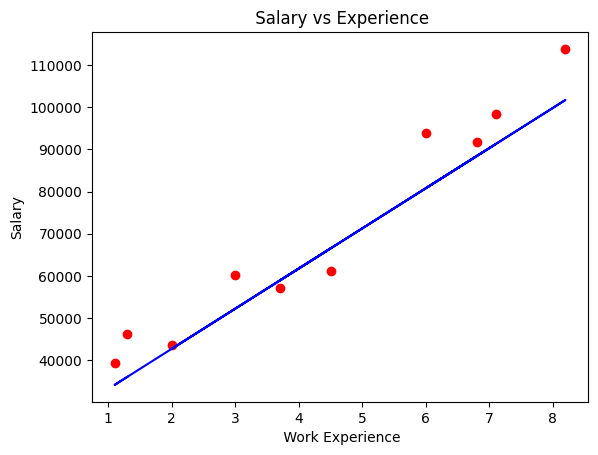

In [59]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()